![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

##<font color='GreeN'>Dicas e Truques de Ciência de Dados </font>

##<font color='black'>Fase de Pré-Processamamento dos Dados</font>

### <font color='grey'>Normalização e Padronização dos Dados</font>
 
### <font color='blUE'> O que é.... e Quando Usar....</font>

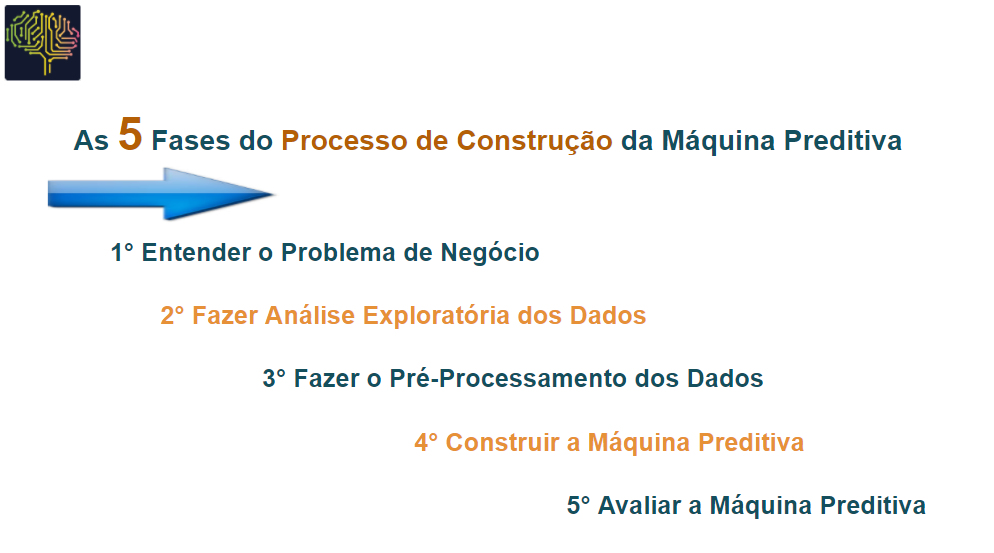

In [76]:
from PIL import Image
%matplotlib inline
im = Image.open("/content/5 Fases.PNG")
im.show()
im 


# <font color='black'>3° Pré-Processamento - Preparando os Dados para Machine Learning</font>

Muitos algoritmos esperam receber os dados em um formato específico. É seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que você está utilizando.


###Normalização

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

E uma das primeiras tarefas dentro do pré-processamento, é colocar seus dados na mesma escala. Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com range entre 0 e 1. Isso é útil para a otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler().

In [ ]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:8]
Y = array[:,8]

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


### Padronização

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Padronização é a técnica para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrão em uma distribuição Gaussiana com a média igual a 0 e desvio padrão igual a 1. Isso é útil para algoritmos que esperam que os dados estejam com uma distribuição Gaussiana, como regressão linear, regressão logística e linear discriminant analysis. Funciona bem quando os dados já estão na mesma escala. O scikit-learn possui uma função para esta etapa, chamada StandardScaler().

In [ ]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import StandardScaler

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Padronizados: \n\n", standardX[0:5,:])

# Resultado da Máquina Preditiva Sem Redimensionamento

In [77]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
random_state = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = random_state)

# Criando o modelo
modelo = KNeighborsClassifier()

# Cross Validation
results = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (results.mean() * 100))

Acurácia: 71.099


# Resultado Com Padronização

In [78]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import StandardScaler

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)



In [80]:
# Definindo os valores para o número de folds
num_folds = 10
random_state = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = random_state)

# Criando o modelo
modelo = KNeighborsClassifier()



In [81]:
# Cross Validation
results = cross_val_score(modelo, standardX, Y, cv = kfold)



In [82]:
# Print do resultado
print("Acurácia: %.3f" % (results.mean() * 100))

Acurácia: 73.966


# Resultado Com Normalização

In [ ]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:8]
Y = array[:,8]

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:])

In [84]:
# Definindo os valores para o número de folds
num_folds = 10
random_state = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = random_state)

# Criando o modelo
modelo = KNeighborsClassifier()



In [85]:
# Cross Validation
results = cross_val_score(modelo, rescaledX, Y, cv = kfold)



In [86]:
# Print do resultado
print("Acurácia: %.3f" % (results.mean() * 100))

Acurácia: 73.835


# Valeu!

### #Instagram - Ciencia dos Dados <a href="http://instagram.com/cienciadosdados">instagram.com/cienciadosdados</a>

### #**Telegram** - Scripts e Datasets - Comunidade Telegram <a href="https://t.me/cienciadosdadosraiz">https://t.me/cienciadosdadosraiz</a>

### #Facebook - Ciencia dos Dados <a href="http://facebook.com/cienciadosdadosbr">facebook.com/cienciadosdadosbr</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

### #Portal Gratuito - Ciencia dos Dados <a href="http://cienciadosdados.com">cienciadosdados.com</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/U7VJljqHwjY?list=PLeR2Gm6UuDXr14EhmTpJ9kdqgG0z2YB-w" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')